# application exploration - 2

Анализ таблицы: application.ipynb

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy

import lightgbm as lgb
from sklearn.model_selection import train_test_split
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import main_functions

import helpers

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
application_df = pd.read_csv('data/application_train.csv')
# application_test_df = pd.read_csv('data/application_test.csv')

application_mod_df, qd = main_functions.build_training_data_for_application(application_df)
# application_mod_test_df, _ = main_functions.build_training_data_for_application(
#     application_df, qd)

bureau = pd.read_csv('data/bureau.csv')
ccb = pd.read_csv('data/credit_card_balance.csv')
pos_cash = pd.read_csv('data/POS_CASH_balance.csv')
ip = pd.read_csv('data/installments_payments.csv')
pa = pd.read_csv('data/previous_application.csv')
application_mod_df['SK_ID_CURR'] = application_df['SK_ID_CURR']
application_mod_df, bureau_features = main_functions.add_bureau_features(application_mod_df, bureau)
application_mod_df, ccb_features = main_functions.add_ccb_features(application_mod_df, ccb)
application_mod_df, pos_cash_features = main_functions.add_pos_cash_features(application_mod_df, pos_cash)
application_mod_df, ip_features = main_functions.add_installments_payment_features(application_mod_df, ip)
application_mod_df, pa_features = main_functions.add_previous_application_features(application_mod_df, pa)
# application_mod_test_df, _ = main_functions.add_bureau_features(application_mod_df, bureau)

# X = application_mod_df
# y = application_df['TARGET']

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1108: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


['installments_payment___NUM_INSTALMENT_VERSION_median', 'installments_payment___DAYS_INSTALMENT_median', 'installments_payment___NUM_INSTALMENT_NUMBER_sum', 'installments_payment___NUM_INSTALMENT_NUMBER_mean', 'installments_payment___AMT_PAYMENT_mean', 'installments_payment___DAYS_ENTRY_PAYMENT_median', 'installments_payment___DAYS_ENTRY_PAYMENT_mean', 'installments_payment___NUM_INSTALMENT_VERSION_max', 'installments_payment___AMT_INSTALMENT_sum', 'installments_payment___AMT_PAYMENT_median', 'installments_payment___DAYS_ENTRY_PAYMENT_max', 'installments_payment___DAYS_INSTALMENT_min', 'installments_payment___AMT_PAYMENT_min', 'installments_payment___AMT_INSTALMENT_min', 'installments_payment___AMT_PAYMENT_max', 'installments_payment___NUM_INSTALMENT_VERSION_mean', 'installments_payment___DAYS_ENTRY_PAYMENT_sum', 'installments_payment___NUM_INSTALMENT_VERSION_min', 'installments_payment___DAYS_INSTALMENT_sum', 'installments_payment___DAYS_ENTRY_PAYMENT_min', 'installments_payment___NU

## WOE

In [4]:
application_modified_df = application_mod_df
application_modified_df['TARGET'] = application_df['TARGET']

In [5]:
main_woe_table, woe_table = helpers.woe(application_modified_df)

/Users/juliasemavina/Learning/hse/business/HomeCredit1/helpers.py:108: RuntimeWarning: divide by zero encountered in log
  woe = np.log(percent_of_one / percent_of_zero)


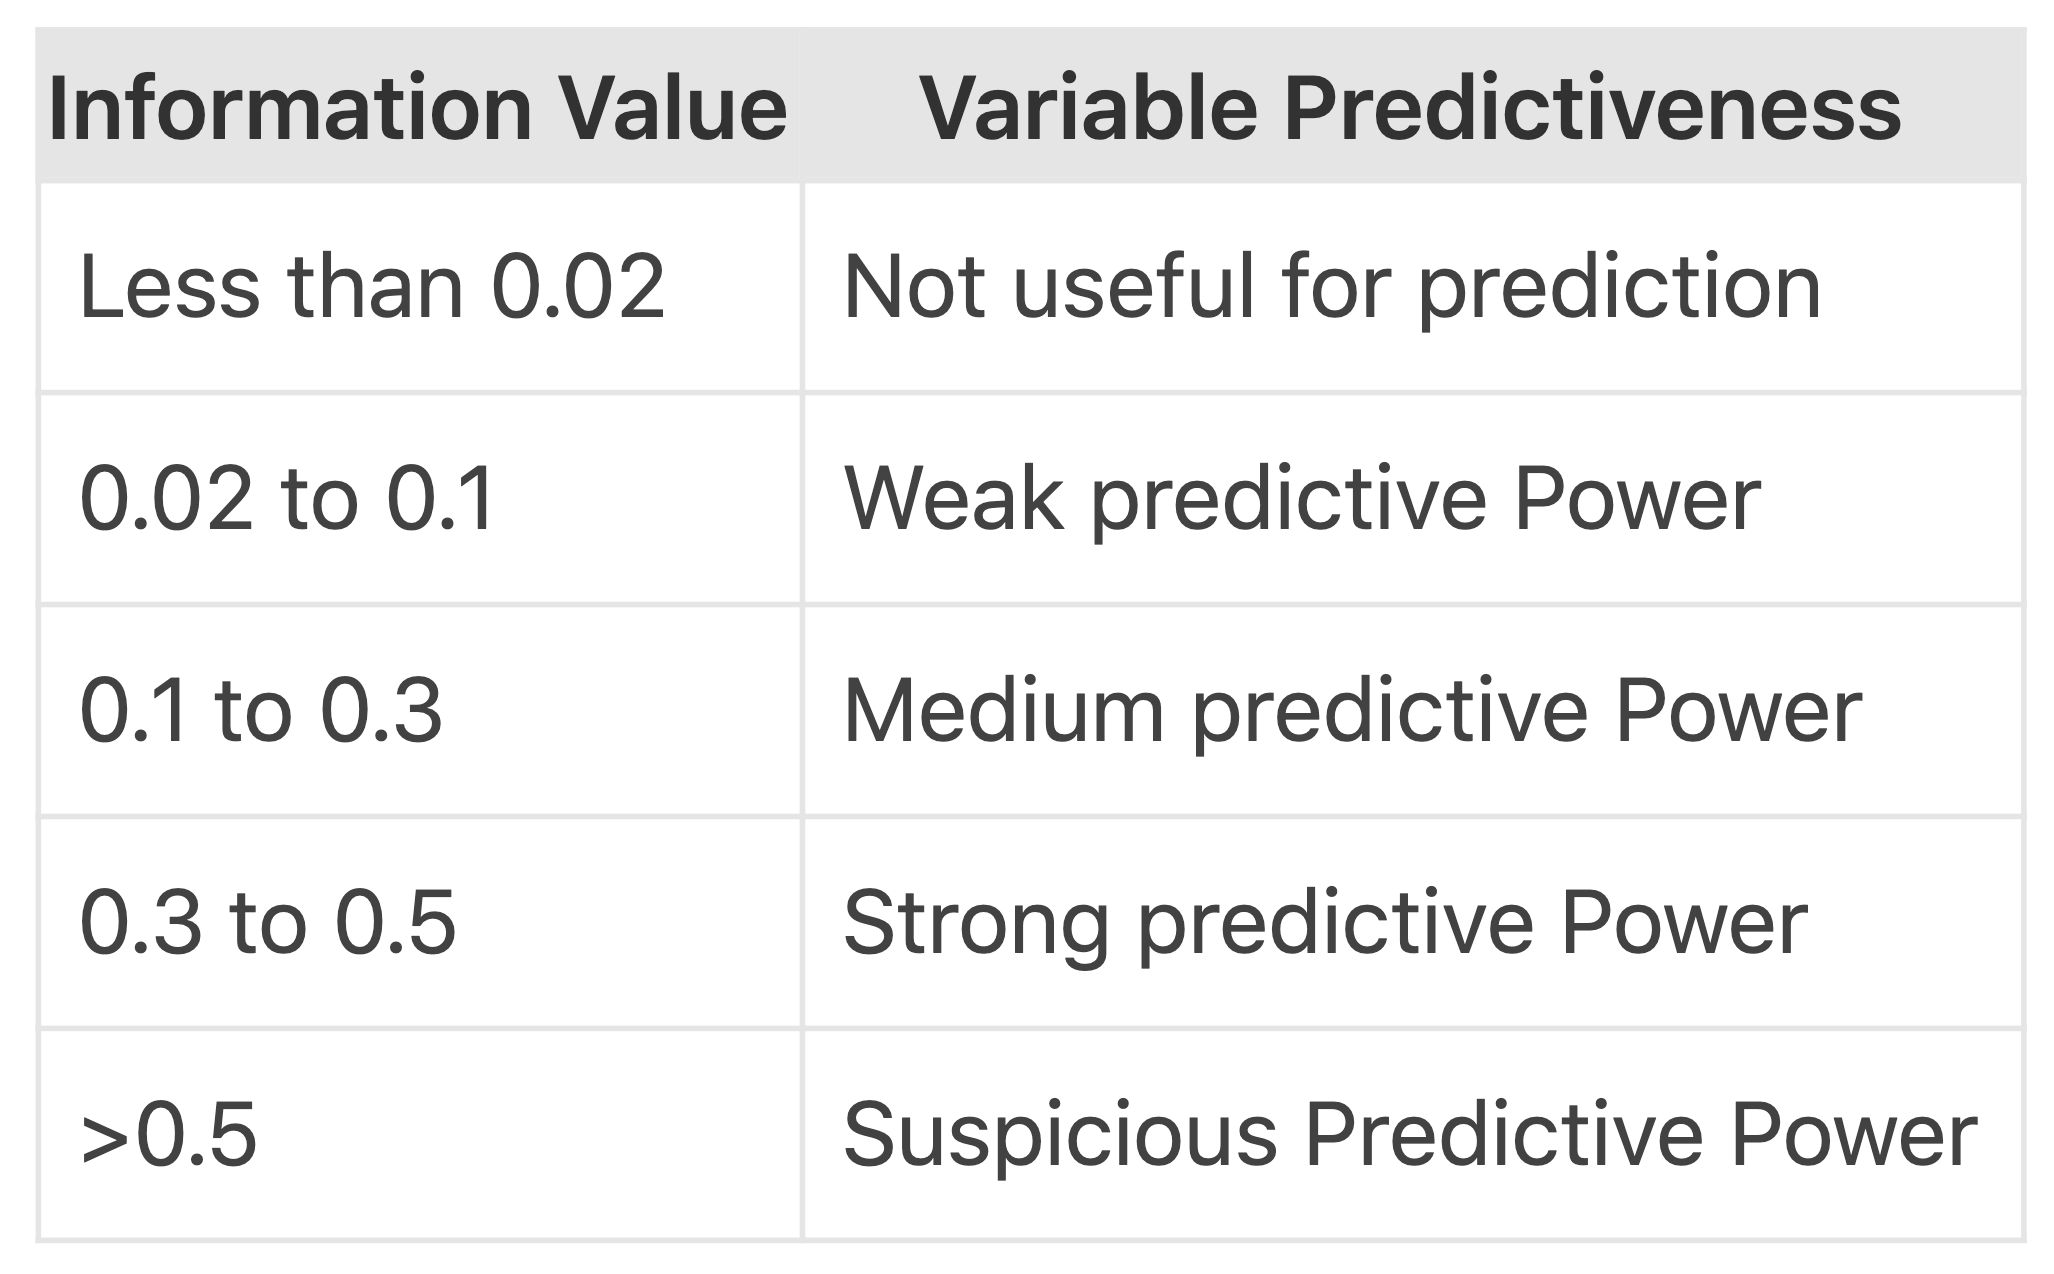

In [6]:
Image(filename='pics/woe-application-1.png')

In [7]:
main_woe_table[main_woe_table['iv'] >= 0.1].sort_values(['iv'], ascending=False)[['iv']]

,iv
TARGET,inf
ccb__AMT_DRAWINGS_ATM_CURRENT_min,inf
ccb__SK_DPD_DEF_max,inf
application__EXT_SOURCES_mean,54.750227
application__EXT_SOURCES_nanmedian,51.954356
application__EXT_SOURCES_min,41.939721
application__EXT_SOURCES_max,39.128520
application__EXT_SOURCE_3,28.655369
application__EXT_SOURCE_2,27.047315
application__EXT_SOURCE_1,13.144308


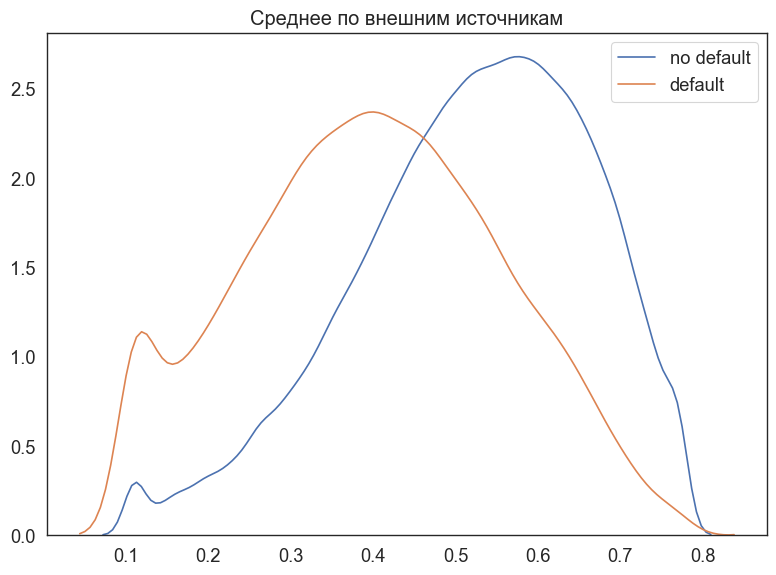

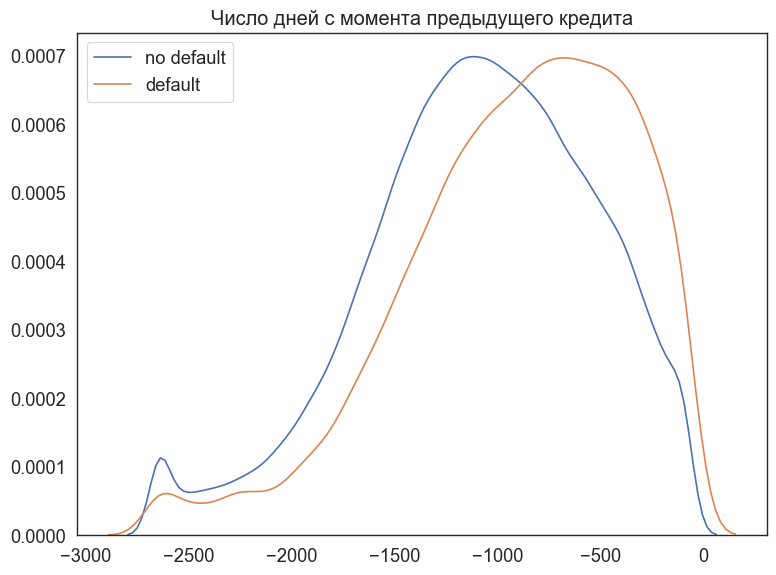

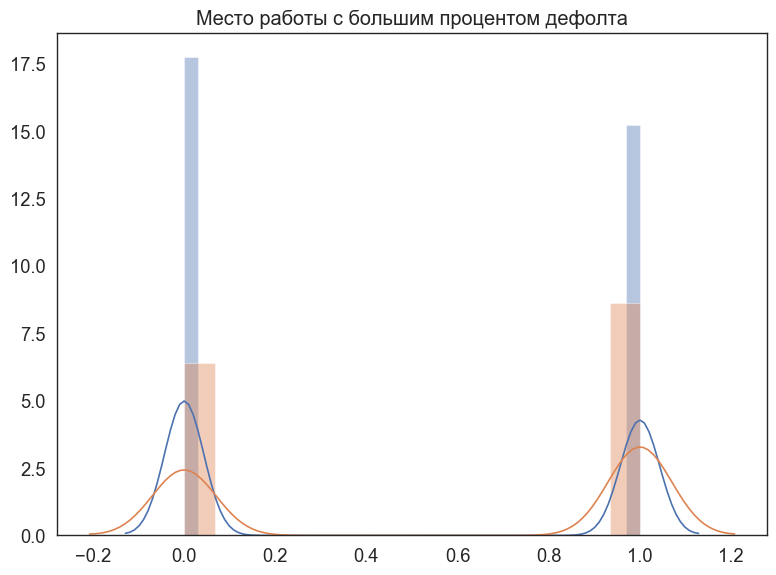

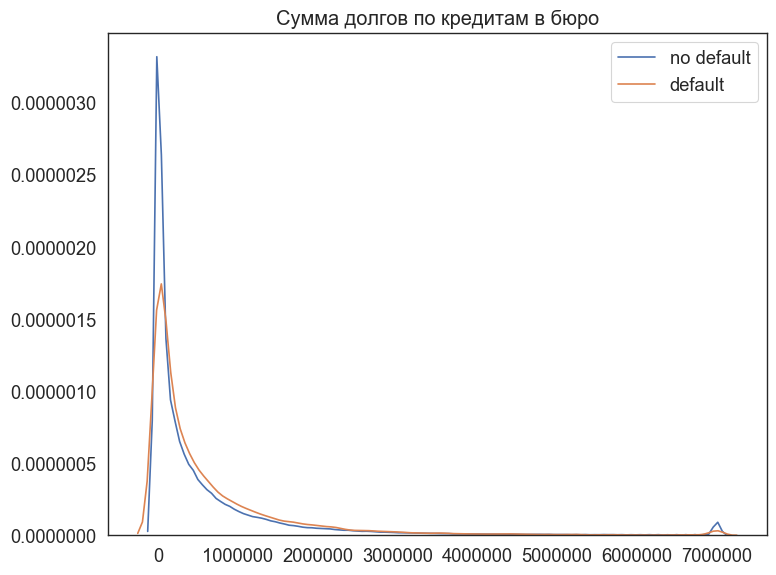

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


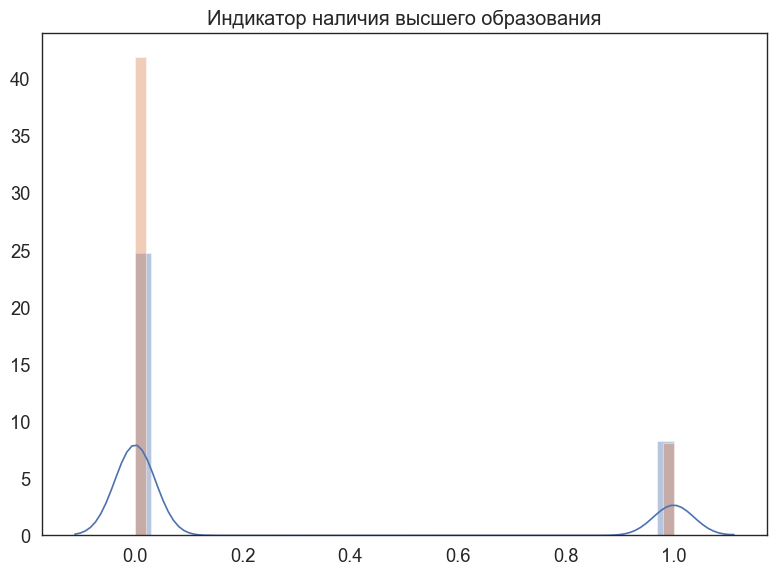

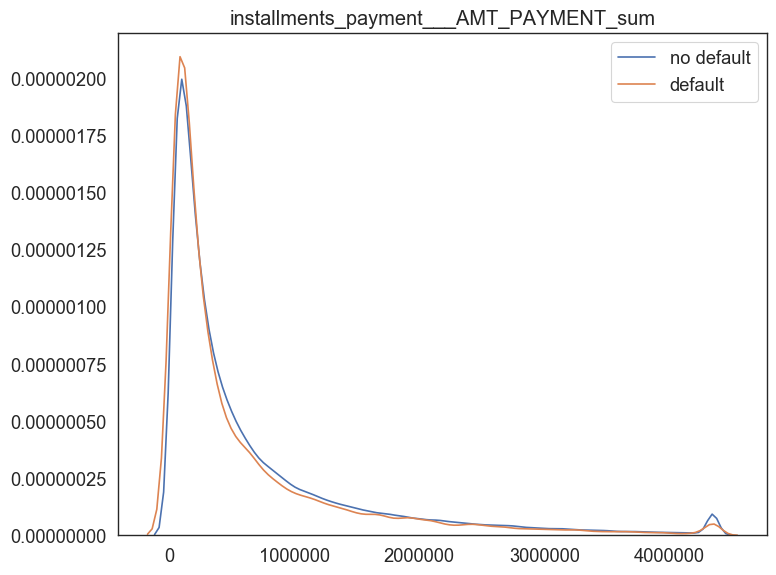

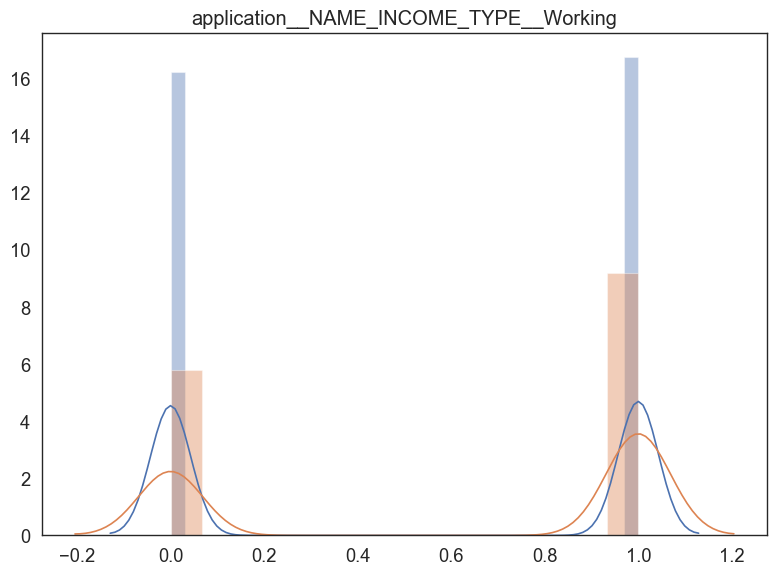

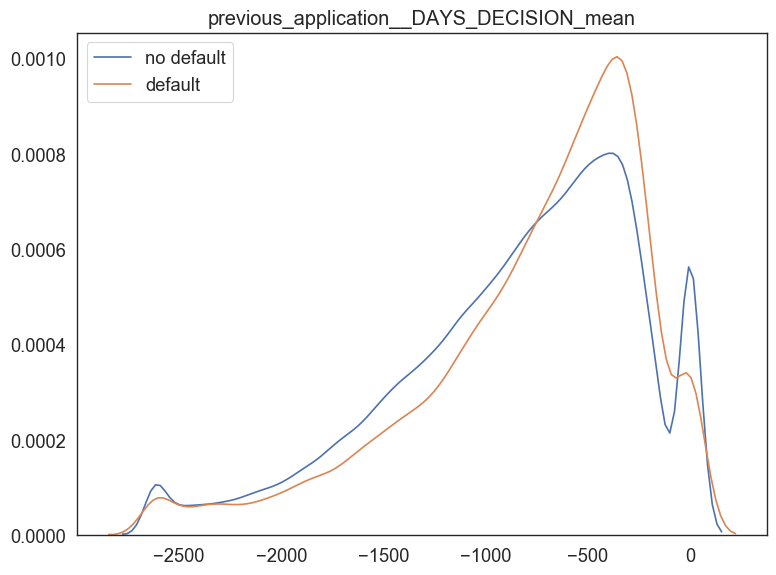

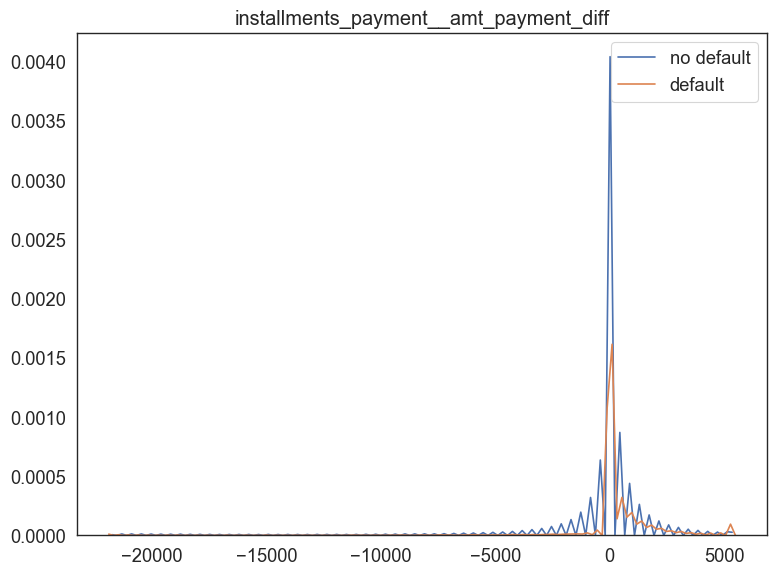

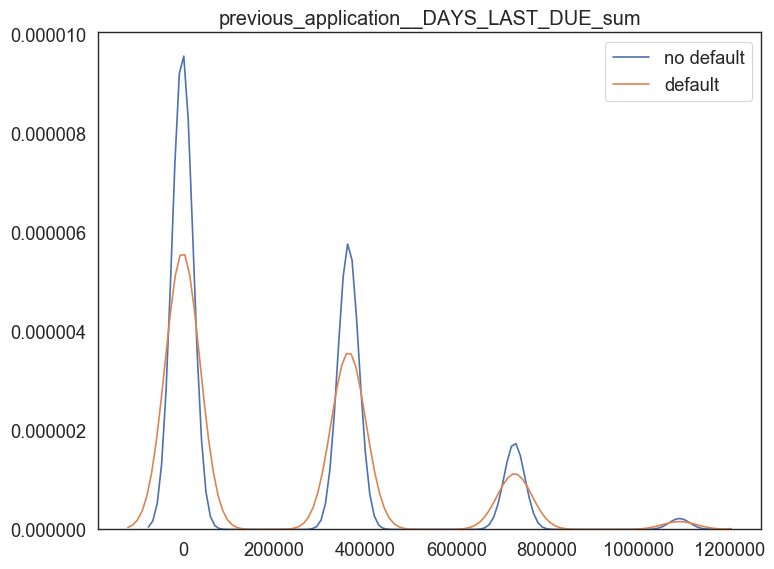

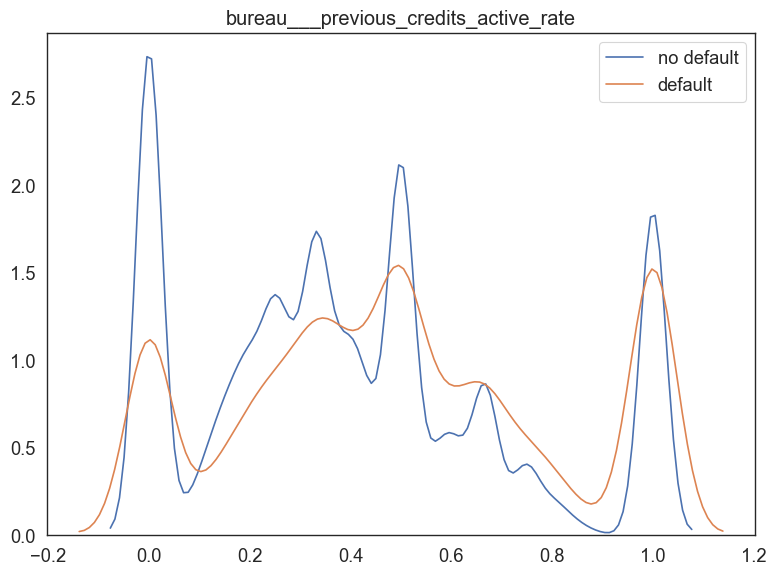

In [41]:
import seaborn as sns
application = application_mod_df
features = [
    'application__EXT_SOURCES_mean', 
    'bureau___DAYS_CREDIT_mean',
    'application__ORGANIZATION_TYPE__high_default_rate',
    'bureau___AMT_CREDIT_SUM_DEBT_sum',
    'application__NAME_EDUCATION_TYPE__Higher education',
    'installments_payment___AMT_PAYMENT_sum',
    'application__NAME_INCOME_TYPE__Working',
    'previous_application__DAYS_DECISION_mean',
    'installments_payment__amt_payment_diff',
    'previous_application__DAYS_LAST_DUE_sum',
    'bureau___previous_credits_active_rate',
]
titles = [
    'Среднее по внешним источникам',
    'Число дней с момента предыдущего кредита',
    'Место работы с большим процентом дефолта',
    'Сумма долгов по кредитам в бюро',
    'Индикатор наличия высшего образования',
    'installments_payment___AMT_PAYMENT_sum',
    'application__NAME_INCOME_TYPE__Working',
    'previous_application__DAYS_DECISION_mean',
    'installments_payment__amt_payment_diff',
    'previous_application__DAYS_LAST_DUE_sum',
    'bureau___previous_credits_active_rate',
]

for i in range(len(features)):
    feature = features[i]
    title = titles[i]
    sns.set(context="paper", style="white", font_scale=1.5)
    f = plt.figure(figsize=(8, 6), dpi=100)
    hist=False
    if len(np.unique(application[feature])) < 20:
        hist=True
    resultive_df = application.copy(deep=True)
    ql, qr = resultive_df[feature].quantile(0.01), resultive_df[feature].quantile(0.99)
    resultive_df.loc[resultive_df[feature] > qr, feature] = qr
    resultive_df.loc[resultive_df[feature] < ql, feature] = ql
    sns.distplot(resultive_df[resultive_df['TARGET'] == 0][feature],
                 hist=hist, label='no default')
    sns.distplot(resultive_df[resultive_df['TARGET'] == 1][feature],
                 hist=hist, label='default')
    plt.tight_layout()
    plt.title(title)
    plt.xlabel(None)
    f.savefig('{}.png'.format(feature), dpi=f.dpi)
    plt.show()

In [8]:
main_woe_table.shape

(255, 8)

In [9]:
woe_table.sort_values(['%_of_data'], ascending=False)

,woe,iv,%target=1,%target=0,min,max,count,%_of_data
ccb__CNT_DRAWINGS_ATM_CURRENT_min__0.0,-0.003170,1.000620e-03,99.444109,99.759804,0.000000e+00,0.000000e+00,306694.0,99.734318
ccb__AMT_DRAWINGS_ATM_CURRENT_min__0.0,-0.003170,1.000620e-03,99.444109,99.759804,0.000000e+00,0.000000e+00,306694.0,99.734318
application__OCCUPATION_TYPE__Low-skill Laborers__0.0,-0.008414,7.006440e-03,98.553877,99.386599,0.000000e+00,0.000000e+00,305418.0,99.319374
ccb__CNT_DRAWINGS_CURRENT_min__0.0,-0.007547,5.631055e-03,98.489426,99.235548,0.000000e+00,0.000000e+00,304975.0,99.175314
ccb__CNT_DRAWINGS_POS_CURRENT_min__0.0,-0.006513,4.193431e-03,98.541793,99.185669,0.000000e+00,0.000000e+00,304847.0,99.133690
application__NAME_EDUCATION_TYPE__Lower secondary__0.0,-0.004843,2.312089e-03,98.320242,98.797606,0.000000e+00,0.000000e+00,303695.0,98.759069
application__NAME_HOUSING_TYPE__Rented apartment__0.0,-0.009251,8.389790e-03,97.579053,98.485953,0.000000e+00,0.000000e+00,302630.0,98.412740
application__OCCUPATION_TYPE__Cooking staff__0.0,-0.006316,3.902282e-03,97.498489,98.116284,0.000000e+00,0.000000e+00,301565.0,98.066411
application__OCCUPATION_TYPE__Security staff__0.0,-0.008065,6.340877e-03,97.091641,97.877857,0.000000e+00,0.000000e+00,300790.0,97.814387
application__OCCUPATION_TYPE__Medicine staff__0.0,0.005270,2.705971e-03,97.695871,97.182386,0.000000e+00,0.000000e+00,298974.0,97.223839


### Слабые признаки (iv < 0.1)

In [13]:
for f in np.array(main_woe_table[main_woe_table['iv'] < 0.1].index):
    print('\'{}\','.format(f))

'SK_ID_CURR',
'pos_cash__SELLERPLACE_AREA_min',
'pos_cash__DAYS_TERMINATION_max',


## Корреляции

In [14]:
COLS_WITH_BIG_CORR_TO_REMOVE = []

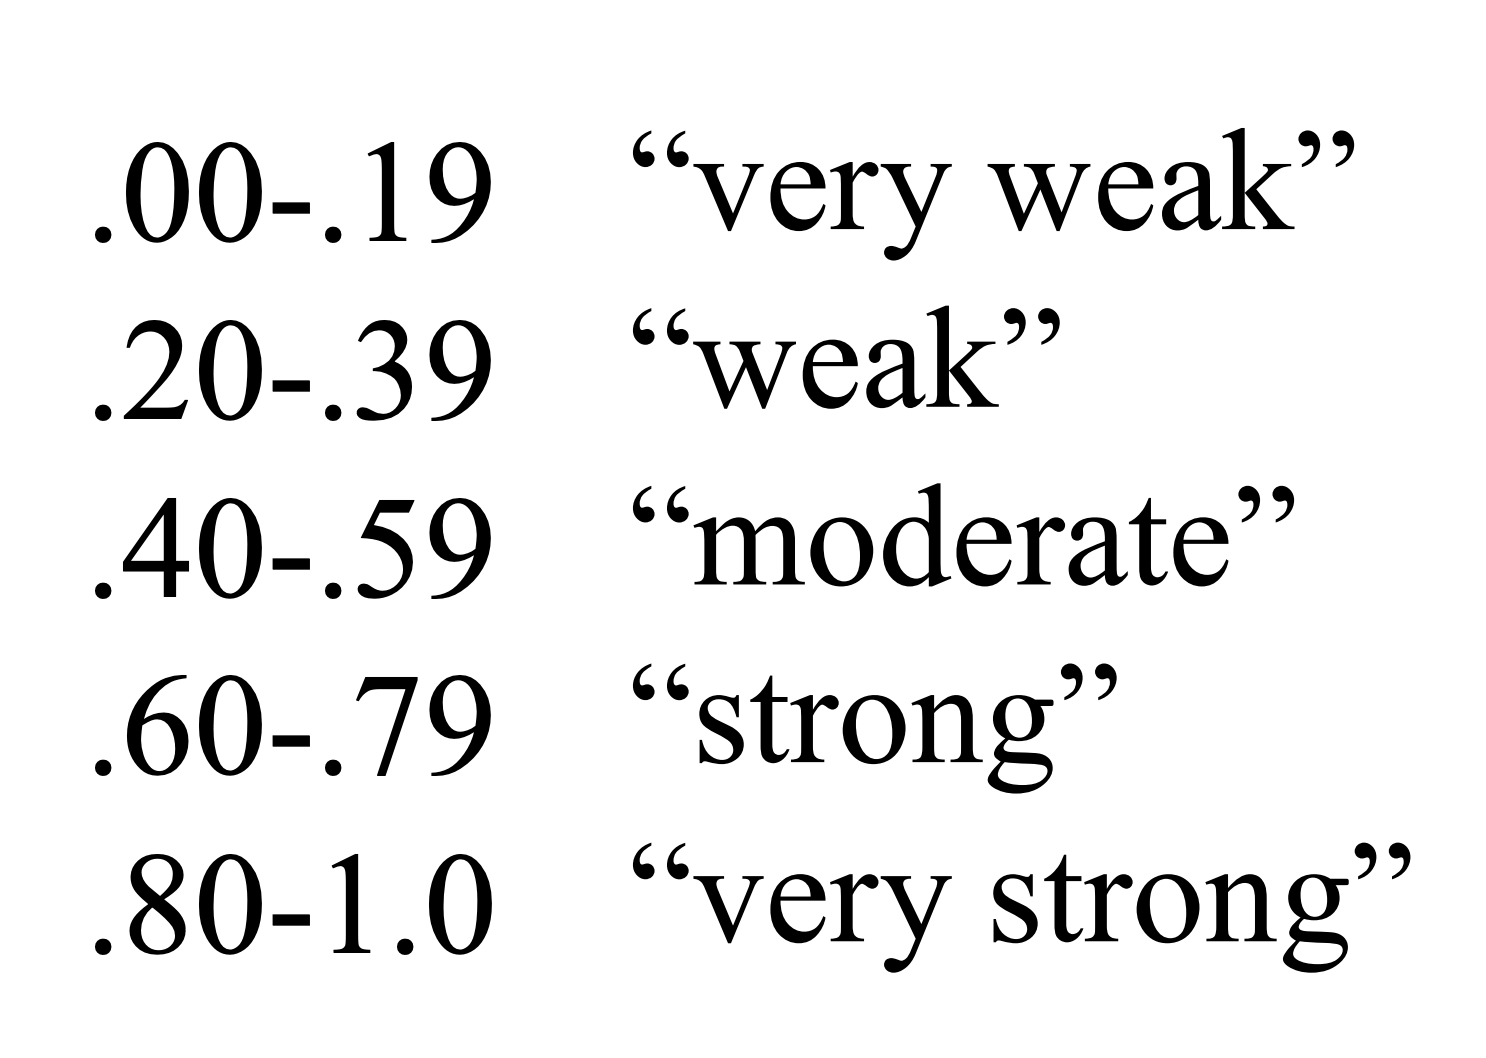

In [15]:
Image(filename='pics/corr.png')

In [16]:
EXT_SOURCE = ['application__EXT_SOURCE_1', 
              'application__EXT_SOURCE_2', 'application__EXT_SOURCE_3']
APARTMENT_GROUP = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 
                   'YEARS_BUILD_AVG',
                   'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 
                   'FLOORSMIN_AVG', 'LANDAREA_AVG',
                   'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
                   'NONLIVINGAREA_AVG',
                   'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 
                   'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 
                   'ELEVATORS_MODE', 'ENTRANCES_MODE',
                   'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 
                   'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
                   'LIVINGAREA_MODE', 
                   'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                   'BASEMENTAREA_MEDI',
                   'YEARS_BUILD_MEDI',
                   'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 
                   'FLOORSMAX_MEDI',
                   'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
                   'LIVINGAREA_MEDI',
                   'YEARS_BEGINEXPLUATATION_MODE',
                    'NONLIVINGAPARTMENTS_MODE',
                    'NONLIVINGAPARTMENTS_MEDI', 
                    'YEARS_BEGINEXPLUATATION_MEDI',
                    'NONLIVINGAPARTMENTS_AVG',
                    'YEARS_BEGINEXPLUATATION_AVG',
                   'NONLIVINGAREA_MEDI', 
                   'TOTALAREA_MODE']
APARTMENT_GROUP2 = [
    'YEARS_BEGINEXPLUATATION_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAPARTMENTS_MEDI', 
    'YEARS_BEGINEXPLUATATION_MEDI',
    'NONLIVINGAPARTMENTS_AVG',
    'YEARS_BEGINEXPLUATATION_AVG', 
]
APARTMENT_GROUP3 = ['APARTMENTS_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP4 = ['BASEMENTAREA_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP5 = ['LANDAREA_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP6 = ['ELEVATORS_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP7 = ['COMMONAREA_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP8 = ['LIVINGAREA_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP9 = ['NONLIVINGAREA_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP10 = ['ENTRANCES_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP11 = ['FLOORSMAX_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APARTMENT_GROUP12 = ['FLOORSMIN_{}'.format(a) for a in ['AVG', 'MEDI', 'MODE']]
APTM = ['application__{}'.format(f) for f in APARTMENT_GROUP]
APTM2 = ['application__{}'.format(f) for f in APARTMENT_GROUP2]
APTM3 = ['application__{}'.format(f) for f in APARTMENT_GROUP3]
APTM4 = ['application__{}'.format(f) for f in APARTMENT_GROUP4]
APTM5 = ['application__{}'.format(f) for f in APARTMENT_GROUP5]
APTM6 = ['application__{}'.format(f) for f in APARTMENT_GROUP6]
APTM7 = ['application__{}'.format(f) for f in APARTMENT_GROUP7]
APTM8 = ['application__{}'.format(f) for f in APARTMENT_GROUP8]
APTM9 = ['application__{}'.format(f) for f in APARTMENT_GROUP9]
APTM10 = ['application__{}'.format(f) for f in APARTMENT_GROUP10]
APTM11 = ['application__{}'.format(f) for f in APARTMENT_GROUP11]
APTM12 = ['application__{}'.format(f) for f in APARTMENT_GROUP12]

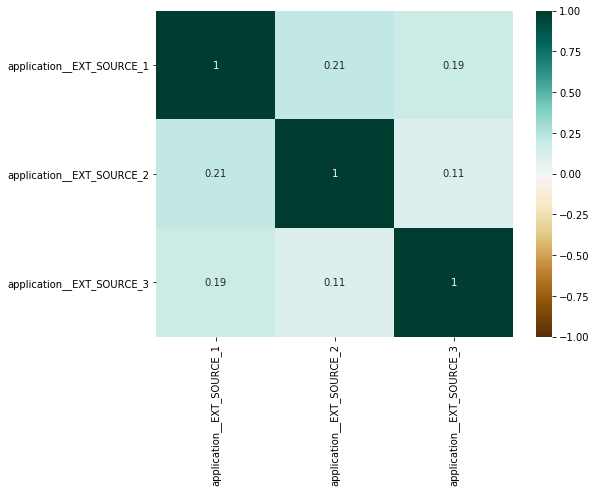

In [52]:
plt.figure(figsize = (8, 6))

sns.heatmap(application_modified_df[EXT_SOURCE].corr(), cmap='BrBG', vmin = -1, annot = True, vmax = 1)

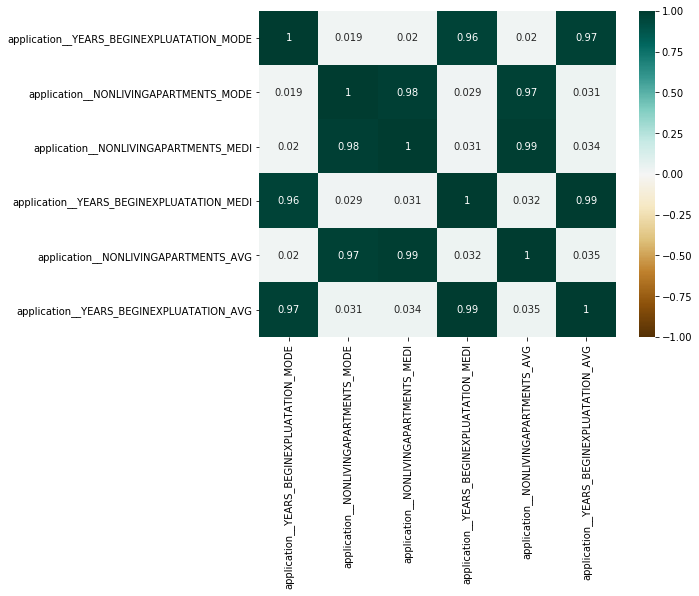

In [53]:
plt.figure(figsize = (8, 6))

sns.heatmap(application_modified_df[APTM2].corr(), cmap='BrBG', vmin = -1, annot = True, vmax = 1)

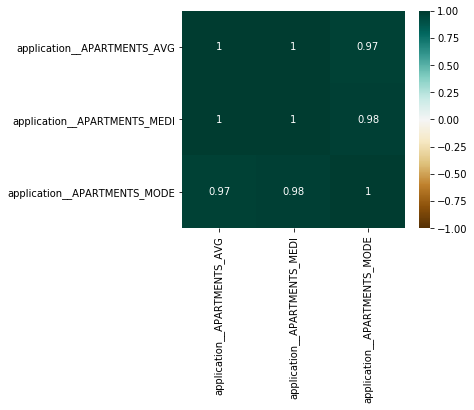

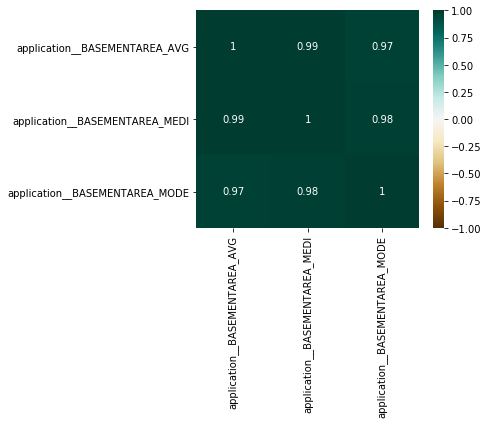

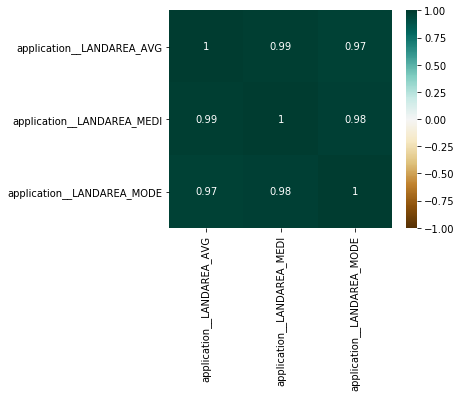

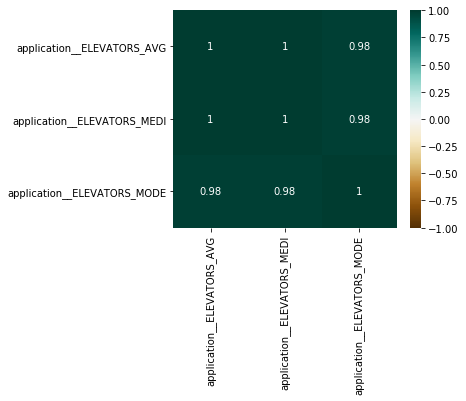

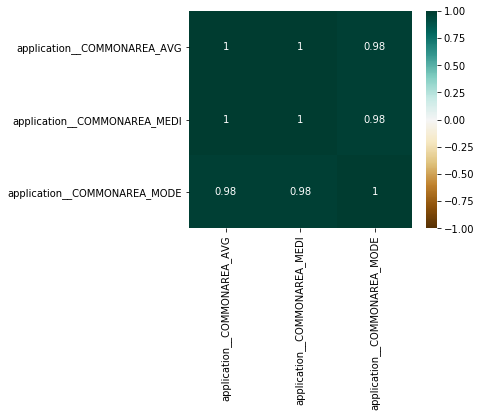

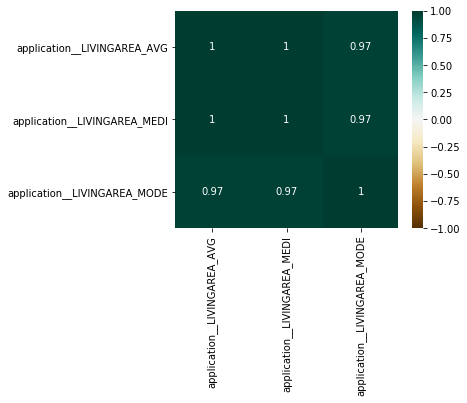

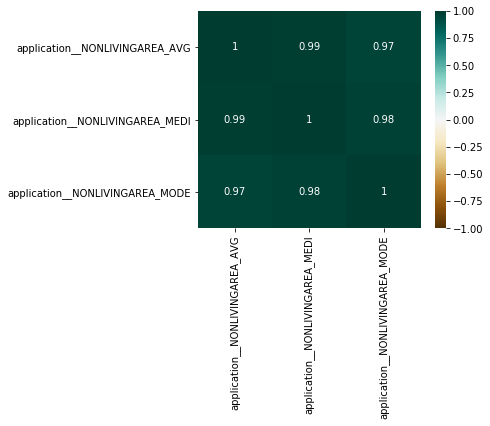

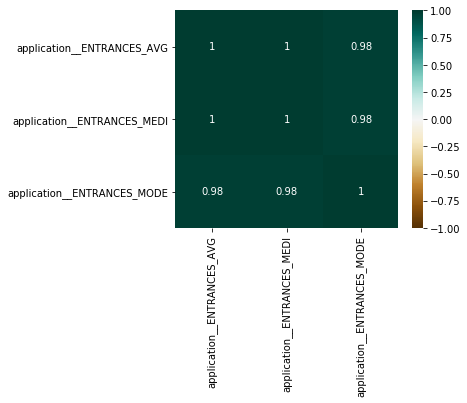

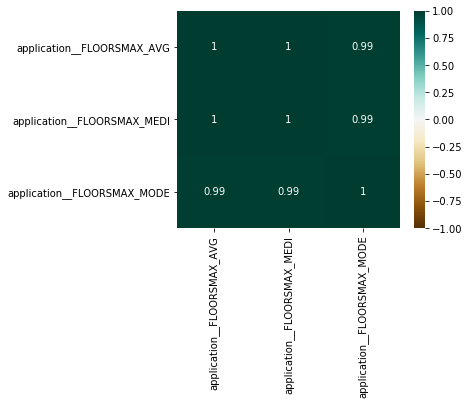

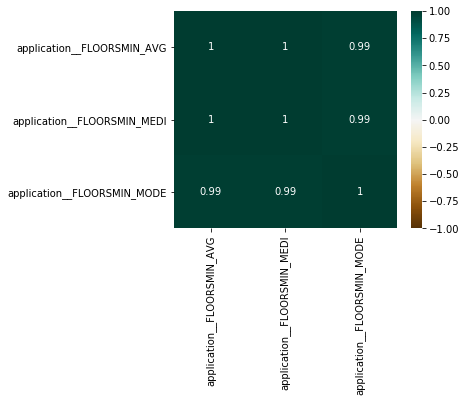

In [58]:
for features in [APTM3, APTM4, APTM5, APTM6, APTM7, APTM8, APTM9, APTM10, APTM11, APTM12]:
    plt.figure(figsize = (5, 4))
    sns.heatmap(application_modified_df[features].corr(),
                cmap='BrBG', vmin = -1, annot = True, vmax = 1)
    plt.show()

In [68]:
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__NONLIVINGAPARTMENTS_MODE')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__NONLIVINGAPARTMENTS_MEDI')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__YEARS_BEGINEXPLUATATION_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__YEARS_BEGINEXPLUATATION_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__APARTMENTS_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__APARTMENTS_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__BASEMENTAREA_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__BASEMENTAREA_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LANDAREA_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LANDAREA_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__ELEVATORS_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__ELEVATORS_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__COMMONAREA_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__COMMONAREA_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LIVINGAREA_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LIVINGAREA_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__NONLIVINGAREA_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__NONLIVINGAREA_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LIVINGAPARTMENTS_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LIVINGAPARTMENTS_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__ENTRANCES_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__ENTRANCES_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__FLOORSMAX_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__FLOORSMAX_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__FLOORSMIN_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__FLOORSMIN_MODE')

COLS_WITH_BIG_CORR_TO_REMOVE.append('application__YEARS_BUILD_AVG')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__YEARS_BUILD_MODE')

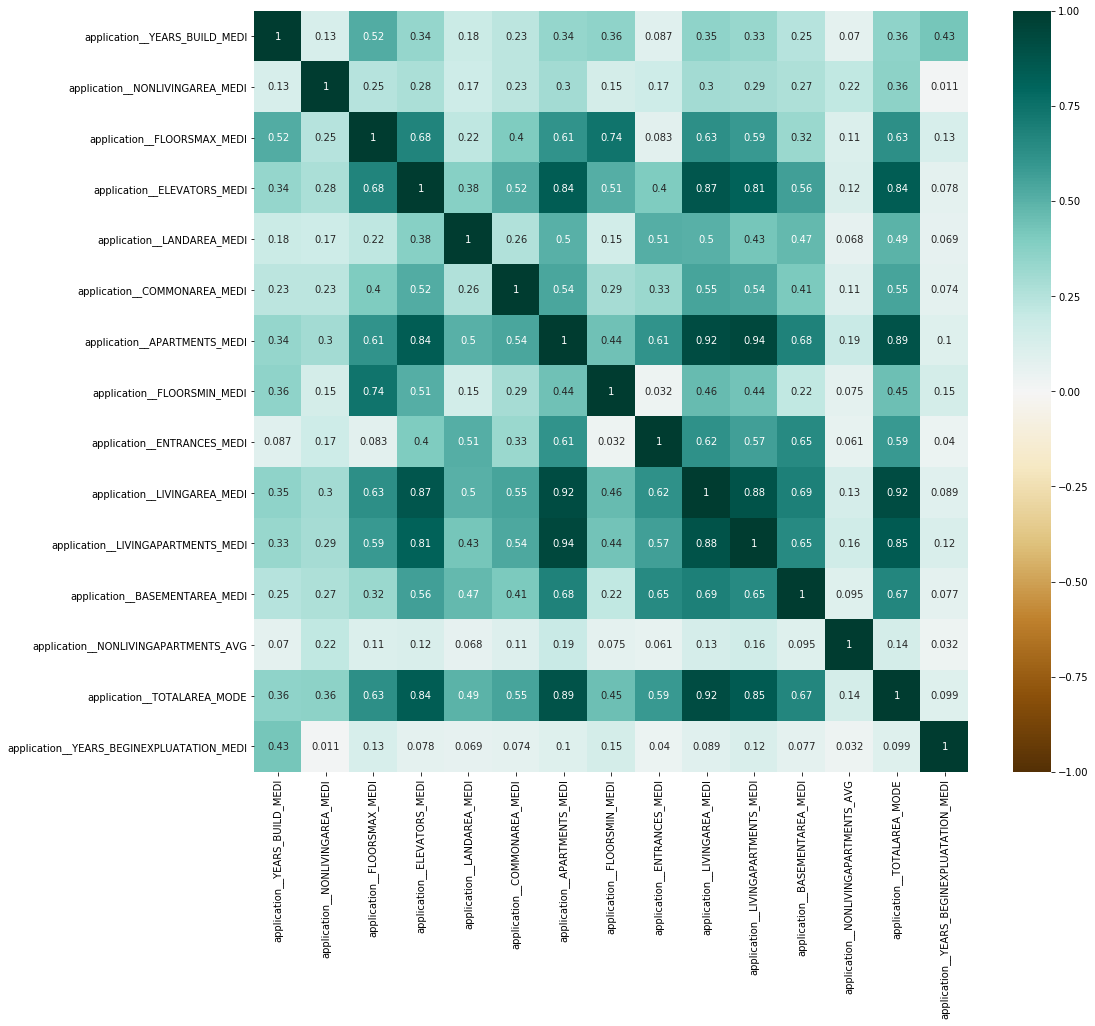

In [71]:
features = list(set(APTM) - set(COLS_WITH_BIG_CORR_TO_REMOVE))
plt.figure(figsize = (16, 14))

sns.heatmap(application_modified_df[features].corr(), 
            cmap='BrBG', vmin = -1, annot = True, vmax = 1)

In [72]:
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LIVINGAPARTMENTS_MEDI')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__APARTMENTS_MEDI')

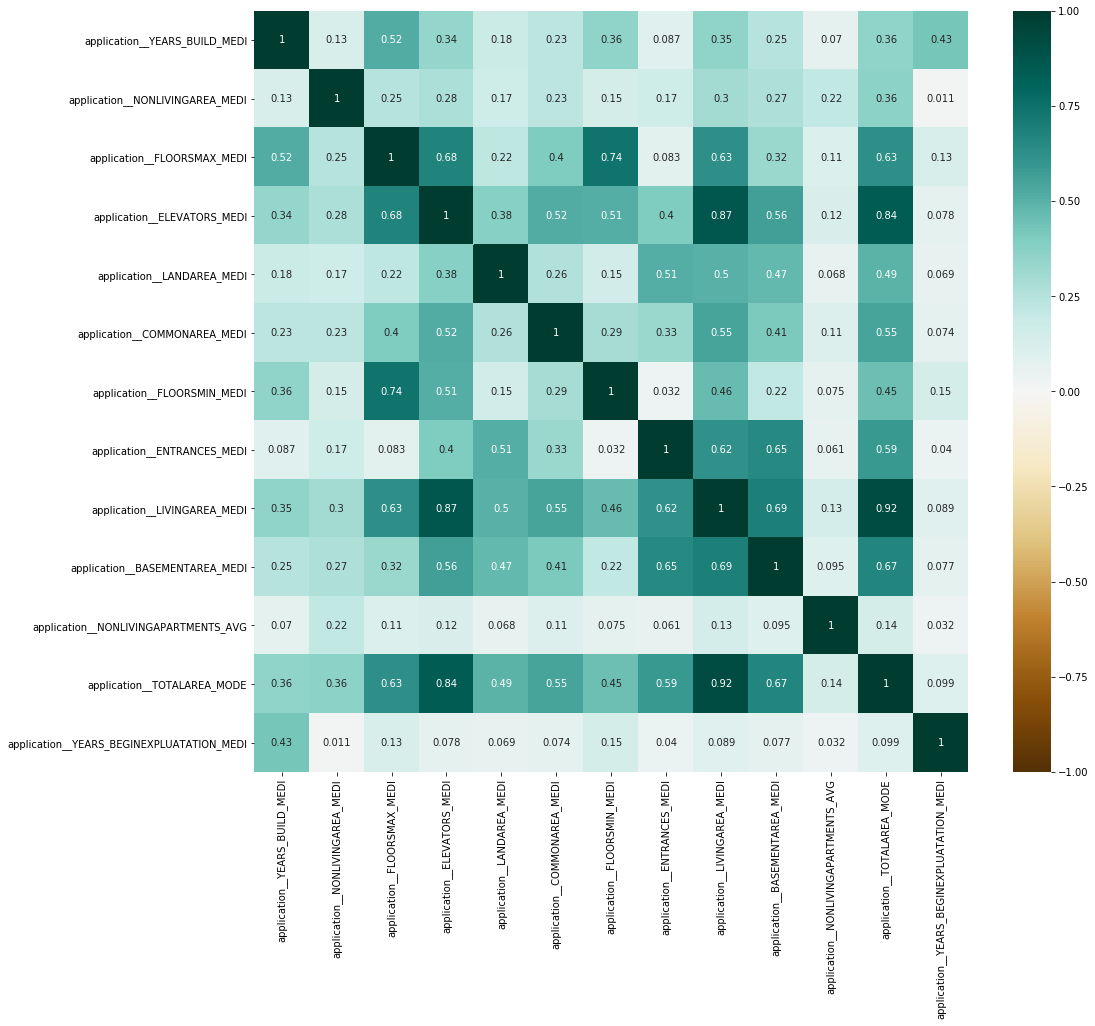

In [73]:
features = list(set(APTM) - set(COLS_WITH_BIG_CORR_TO_REMOVE))
plt.figure(figsize = (16, 14))

sns.heatmap(application_modified_df[features].corr(), 
            cmap='BrBG', vmin = -1, annot = True, vmax = 1)

In [76]:
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__ELEVATORS_MEDI')
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__LIVINGAREA_MEDI')

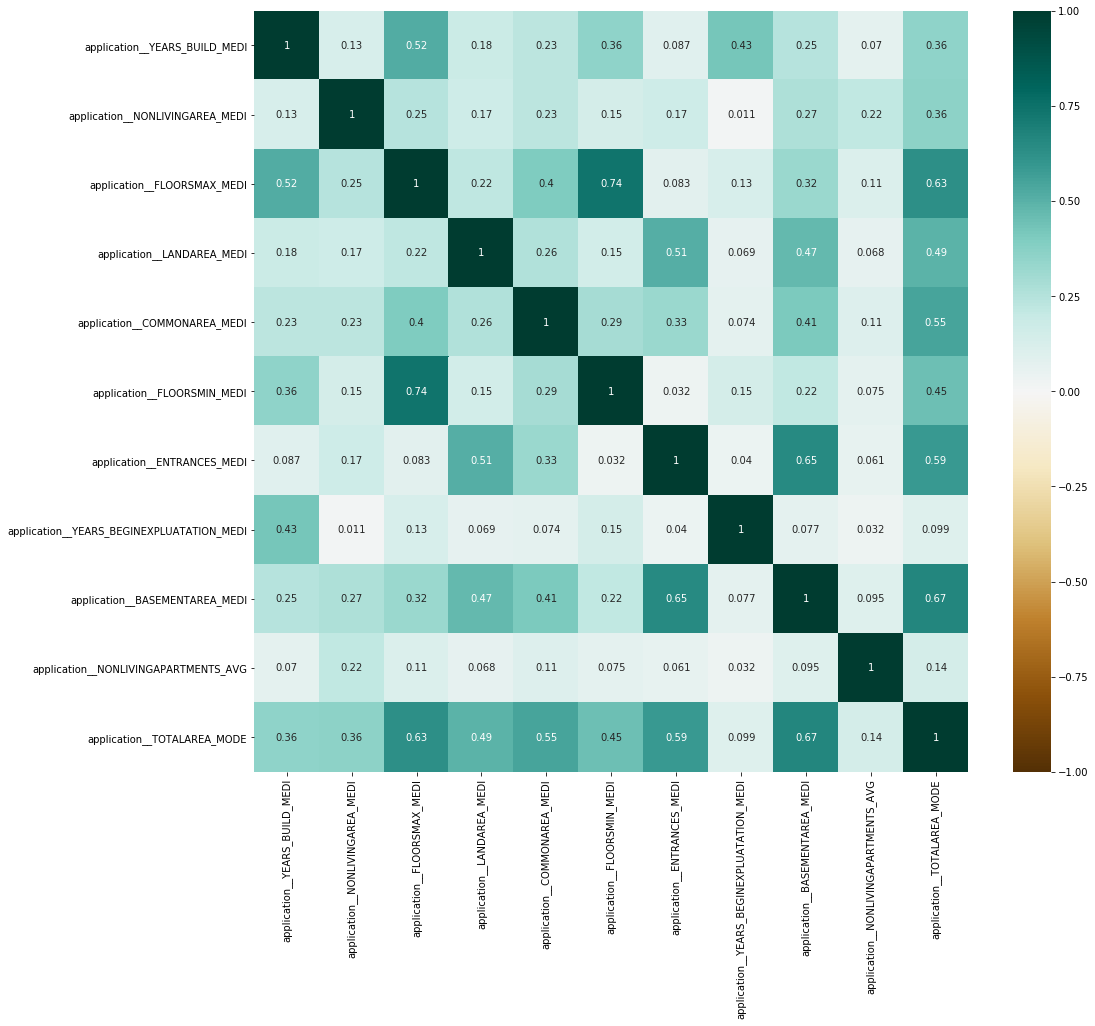

In [77]:
features = list(set(APTM) - set(COLS_WITH_BIG_CORR_TO_REMOVE))
plt.figure(figsize = (16, 14))

sns.heatmap(application_modified_df[features].corr(), 
            cmap='BrBG', vmin = -1, annot = True, vmax = 1)

In [78]:
COLS_WITH_BIG_CORR_TO_REMOVE.append('application__FLOORSMIN_MEDI')

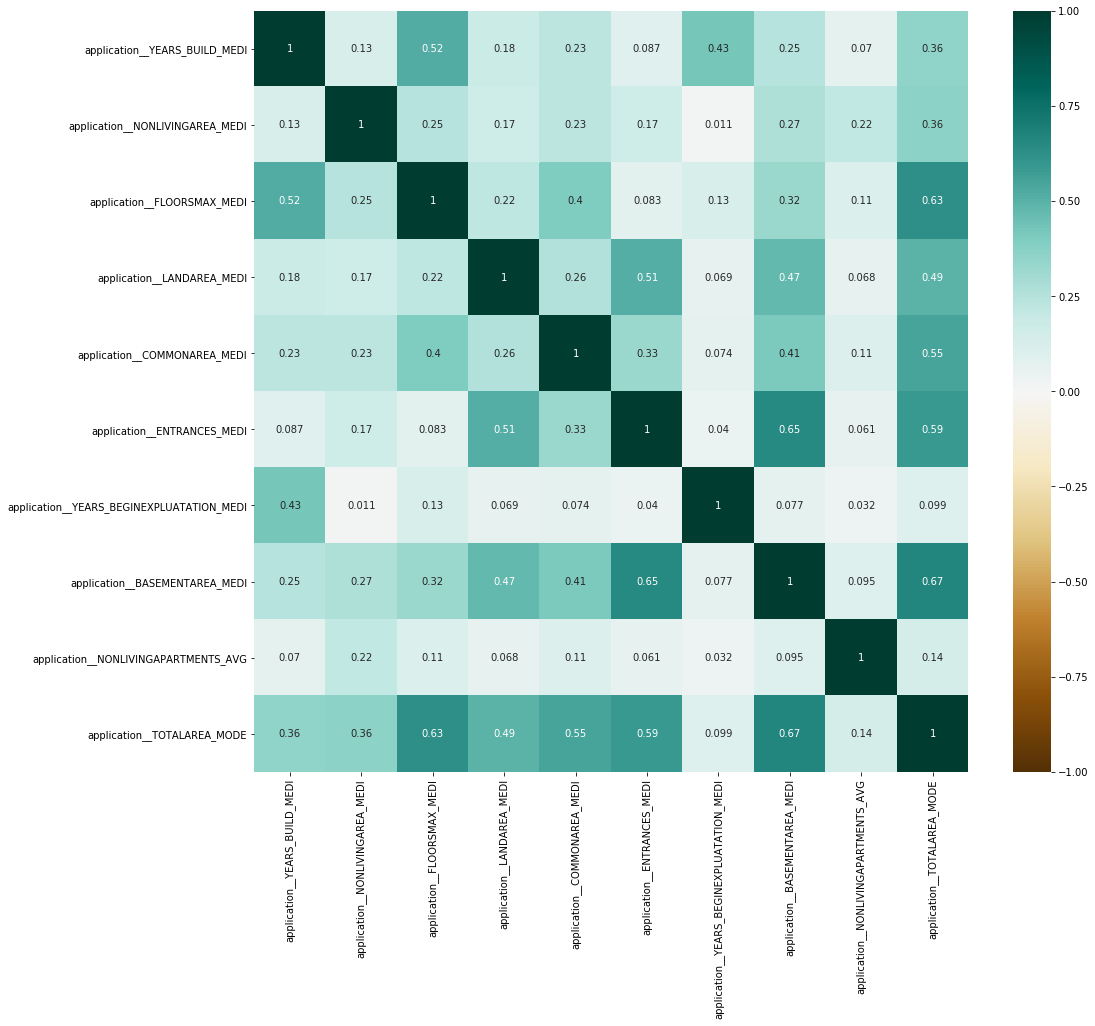

In [79]:
features = list(set(APTM) - set(COLS_WITH_BIG_CORR_TO_REMOVE))
plt.figure(figsize = (16, 14))

sns.heatmap(application_modified_df[features].corr(), 
            cmap='BrBG', vmin = -1, annot = True, vmax = 1)

In [80]:
COLS_WITH_BIG_CORR_TO_REMOVE = list(set(COLS_WITH_BIG_CORR_TO_REMOVE))

In [81]:
COLS_WITH_BIG_CORR_TO_REMOVE

['application__ELEVATORS_MEDI',
 'application__NONLIVINGAREA_AVG',
 'application__LANDAREA_AVG',
 'application__COMMONAREA_MODE',
 'application__ENTRANCES_MODE',
 'application__ELEVATORS_MODE',
 'application__ENTRANCES_AVG',
 'application__LANDAREA_MODE',
 'application__COMMONAREA_AVG',
 'application__NONLIVINGAPARTMENTS_MEDI',
 'application__BASEMENTAREA_MODE',
 'application__LIVINGAPARTMENTS_AVG',
 'application__YEARS_BUILD_MODE',
 'application__LIVINGAREA_AVG',
 'application__LIVINGAREA_MODE',
 'application__APARTMENTS_MEDI',
 'application__FLOORSMIN_MEDI',
 'application__LIVINGAPARTMENTS_MODE',
 'application__APARTMENTS_MODE',
 'application__YEARS_BEGINEXPLUATATION_MODE',
 'application__NONLIVINGAPARTMENTS_MODE',
 'application__NONLIVINGAREA_MODE',
 'application__BASEMENTAREA_AVG',
 'application__FLOORSMIN_MODE',
 'application__YEARS_BEGINEXPLUATATION_AVG',
 'application__LIVINGAREA_MEDI',
 'application__APARTMENTS_AVG',
 'application__YEARS_BUILD_AVG',
 'application__FLOORSMAX_MOD

In [82]:
application_modified_df.drop(COLS_WITH_BIG_CORR_TO_REMOVE, axis=1, inplace=True)

In [83]:
application_modified_df.columns

Index(['application__OCCUPATION_TYPE__Accountants',
       'application__OCCUPATION_TYPE__Cooking staff',
       'application__OCCUPATION_TYPE__Core staff',
       'application__OCCUPATION_TYPE__Drivers',
       'application__OCCUPATION_TYPE__High skill tech staff',
       'application__OCCUPATION_TYPE__Laborers',
       'application__OCCUPATION_TYPE__Low-skill Laborers',
       'application__OCCUPATION_TYPE__Managers',
       'application__OCCUPATION_TYPE__Medicine staff',
       'application__OCCUPATION_TYPE__Sales staff',
       'application__OCCUPATION_TYPE__Security staff',
       'application__OCCUPATION_TYPE__nan', 'application__OWN_CAR_AGE__0_8',
       'application__OWN_CAR_AGE__12_60', 'application__OWN_CAR_AGE__nan',
       'application__CODE_GENDER__male', 'application__CODE_GENDER__female',
       'application__NAME_FAMILY_STATUS__Civil marriage',
       'application__NAME_FAMILY_STATUS__Married',
       'application__NAME_FAMILY_STATUS__Single / not married',
       'appl

In [86]:
corrs = application_modified_df.corr()['TARGET'].sort_values()

In [89]:
corrs

application__EXT_SOURCE_3                                         -0.178919
application__EXT_SOURCE_2                                         -0.160472
application__EXT_SOURCE_1                                         -0.155317
application__ORGANIZATION_TYPE__low_default_rate                  -0.057038
application__NAME_EDUCATION_TYPE__Higher education                -0.056593
application__CODE_GENDER__female                                  -0.054713
application__NAME_INCOME_TYPE__Pensioner                          -0.046209
application__FLOORSMAX_MEDI                                       -0.043768
application__OCCUPATION_TYPE__nan                                 -0.038690
application__REGION_POPULATION_RELATIVE                           -0.037227
application__OWN_CAR_AGE__0_8                                     -0.036551
application__TOTALAREA_MODE                                       -0.032596
application__AMT_CREDIT                                           -0.030183
application_